In [1]:
### Lending Case study


#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#supress scientific notation of values
##pd.options.display.float_format = '{:.2f}'.format

#increasing max number of columns and rows  displayed with pandas.
##pd.set_option('display.max_columns', 150)
##pd.set_option('display.max_rows', 100)

### Data sourcing

input_file=pd.read_csv('/Users/sararamesh/Desktop/upGard/Lending Club/loan.csv',sep =",")

input_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


/var/folders/hg/lzg8fpln4h3bwk2319shcvcw0000gn/T/ipykernel_76779/1241628849.py:19: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  input_file=pd.read_csv('/Users/sararamesh/Desktop/upGard/Lending Club/loan.csv',sep =",")


In [2]:
### Data Understanding

input_file.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
input_file.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## DATA CLEANING

In [4]:
#Finding percentage of null or missing values
null_perc = round(100*(input_file.isnull().sum()/len(input_file.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [6]:
### Removing columns which has more than 30% null values in it.
input_file.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [7]:
#Finding number of unique values in each column
input_file.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [8]:
#Dropping Columns with only one values.
input_file.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [9]:
#Finding number of unique values, printing high unique valued columns
input_file.nunique().sort_values(ascending=False).head(15)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

In [10]:
input_file.drop(['emp_title', 'title'], axis=1, inplace=True)

In [11]:
input_file.drop(['member_id', 'url'], axis=1, inplace=True)

In [12]:
input_file.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
input_file.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [13]:
#Finding percentage of null or missing values
null_perc = round(100*(input_file.isnull().sum()/len(input_file.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [14]:
input_file.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(input_file.isnull().sum()/len(input_file.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off. So, we will remove the rows with Current values in loan status.

In [15]:
#Removing current loan status rows
input_file = input_file[input_file.loan_status != 'Current']

In [17]:
### Checking unique values for term column
input_file.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [18]:
#Stripping empty space in values in term
input_file['term'] = input_file.term.str.strip()
input_file.term.unique()

array(['36 months', '60 months'], dtype=object)

In [19]:
input_file.shape

(36800, 31)

In [20]:
input_file.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

int_rate and revol_util are having '%' symbol values and having data type of object. Need to remove % and convert data type from object to float.

In [21]:
#stripping '%' value
input_file['int_rate'] = input_file.int_rate.str.strip('%').astype(float)
input_file['revol_util'] = input_file.revol_util.str.strip('%').astype(float)

In [22]:
input_file.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [23]:
input_file['approved_loan_amnt_ratio'] = round(input_file.funded_amnt_inv*100/input_file.loan_amnt,2)

#### Univariate Analysis

In [25]:
#Stats of laon amount
input_file.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

/Users/sararamesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

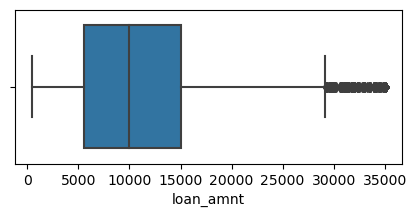

In [26]:
fig = plt.figure(figsize =(5, 2))
sns.boxplot(input_file.loan_amnt)

/Users/sararamesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sararamesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Density'>

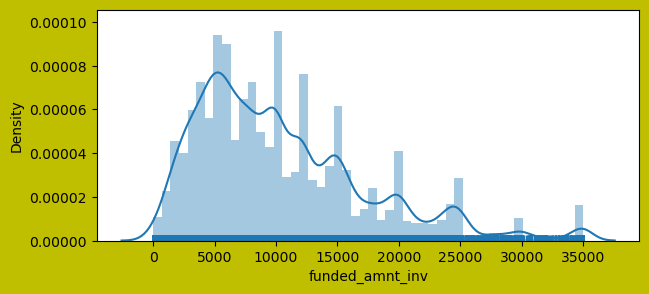

In [27]:
plt.figure(figsize=(7,3),facecolor='y')

sns.distplot(input_file.funded_amnt_inv, rug=True)

Text(0, 0.5, 'Loan Application Count')

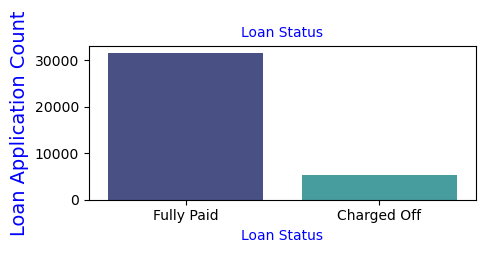

In [28]:
# Univariate Analysis - Loan Status

plt.figure(figsize=(5,2))
ax = sns.countplot(x="loan_status",data=input_file,palette='mako')
ax.set_title('Loan Status',fontsize=10,color='b')
ax.set_xlabel('Loan Status',fontsize=10,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   

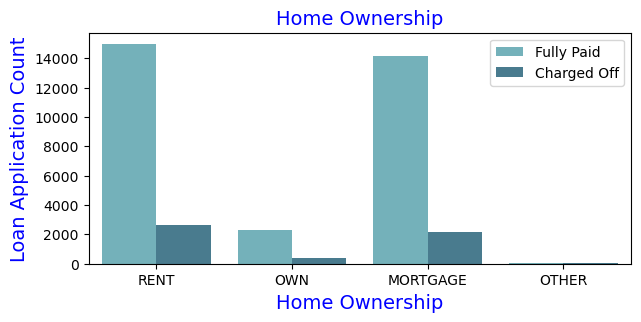

In [29]:
# Univariate Analysis - Home Ownership

plt.figure(figsize=(7,3))
ax = sns.countplot(x="home_ownership",data=input_file,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()